In [ ]:
pip install seaborn matplotlib


In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


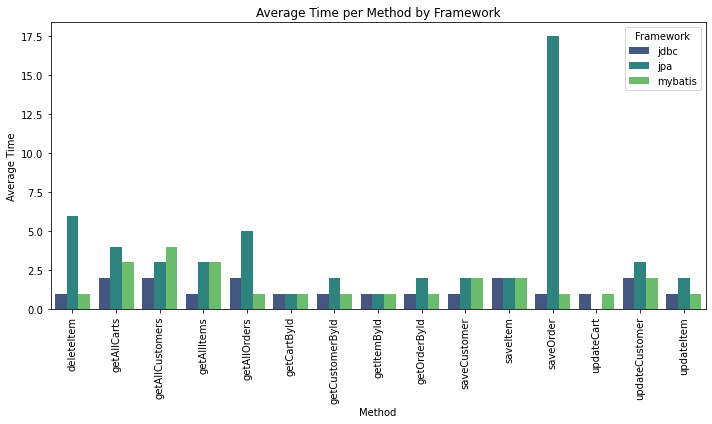

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data1 = pd.read_csv('results_jdbc.csv',sep=';',header=None,names=['framework', 'method', 'time'])
data2 = pd.read_csv('results_jpa.csv',sep=';',header=None, names=['framework', 'method', 'time'])
data3 = pd.read_csv('results_mybatis.csv',sep=';',header=None, names=['framework', 'method', 'time'])

data = pd.concat([data1, data2, data3], ignore_index=True)

# Berechnen Sie den Durchschnitt der Aufrufzeiten für jede Methode pro Framework
avg_times = data.groupby(['framework', 'method'])['time'].median().reset_index()

# Erstellen Sie ein Balkendiagramm mit seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='method', y='time', hue='framework', data=avg_times, palette='viridis')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Method')
plt.ylabel('Average Time')
plt.title('Average Time per Method by Framework')
plt.xticks(rotation=90)
plt.legend(title='Framework')

# Diagramm anzeigen
plt.tight_layout()
plt.show()

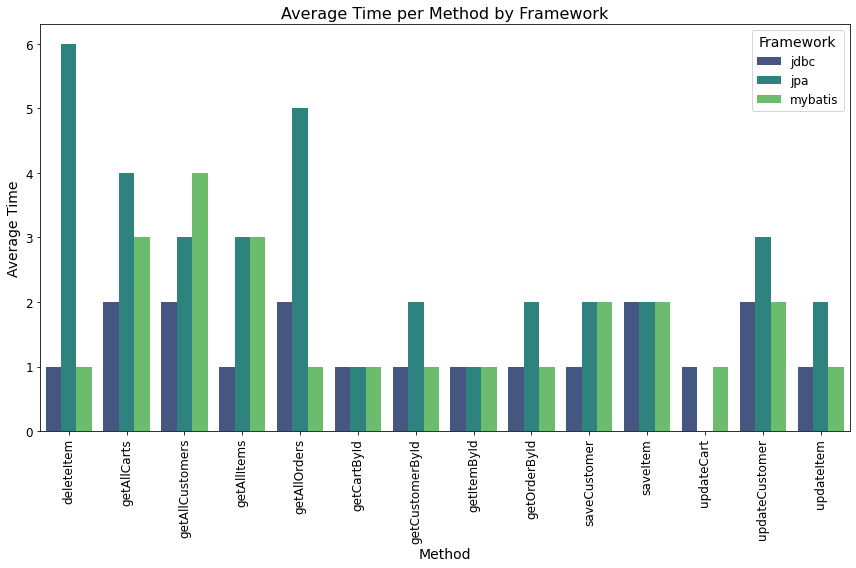

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

def load_data(file_path, column_names):
    # Try to load the data and return it, handle file not found exception
    try:
        data = pd.read_csv(file_path, sep=';', header=None, names=column_names)
        return data
    except FileNotFoundError:
        print(f"No file found at {file_path}")
        return pd.DataFrame()

def concatenate_data(files):
    # Load and concatenate data from all specified files
    data_frames = [load_data(Path(file), ['framework', 'method', 'time']) for file in files]
    return pd.concat(data_frames, ignore_index=True)

def filter_methods(data, methods_to_include):
    # Filter the data to include only specified methods
    return data[data['method'].isin(methods_to_include)]

def plot_avg_times(avg_times):
    # Create a bar plot of the average times with specified figure size
    plt.figure(figsize=(12, 8))  # You can adjust the size as per your requirement
    sns.barplot(x='method', y='time', hue='framework', data=avg_times, palette='viridis')
    
    # Adjusting font size for readability
    plt.xlabel('Method', fontsize=14)
    plt.ylabel('Average Time', fontsize=14)
    plt.title('Average Time per Method by Framework', fontsize=16)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Framework', fontsize=12, title_fontsize=14)
    
    # Ensure layout is tight to avoid cropping labels
    plt.tight_layout()
    
    # Save the plot with very high resolution
    plt.savefig("average_time_per_method.png", dpi=600)  # Increased dpi for higher quality
    
    # Display the plot
    plt.show()

# List of file names and framework names
files = ['results_jdbc.csv', 'results_jpa.csv', 'results_mybatis.csv']

# Load and concatenate data
data = concatenate_data(files)

# Methods you want to display
methods_to_include = [
    'deleteItem', 'getAllCarts', 'getAllCustomers', 'getAllItems', 
    'getAllOrders', 'getCartById', 'getCustomerById', 'getItemById', 
    'getOrderById', 'saveCustomer', 'saveItem', 
    'updateCart', 'updateCustomer', 'updateItem'
   #'saveOrder',
]

# Filter data, calculate average times, and plot
if not data.empty:
    filtered_data = filter_methods(data, methods_to_include)
    avg_times = filtered_data.groupby(['framework', 'method'])['time'].median().reset_index()
    plot_avg_times(avg_times)



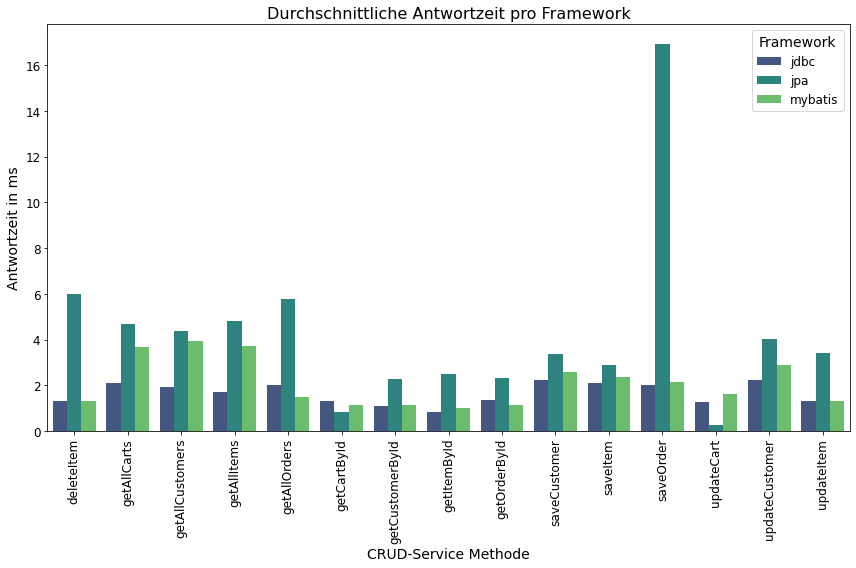

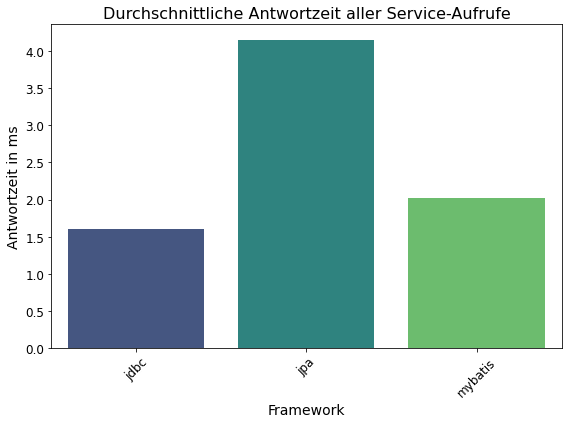

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

def load_data(file_path, column_names):
    try:
        data = pd.read_csv(file_path, sep=';', header=None, names=column_names)
        return data
    except FileNotFoundError:
        print(f"No file found at {file_path}")
        return pd.DataFrame()

def concatenate_data(files):
    data_frames = [load_data(Path(file), ['framework', 'method', 'time']) for file in files]
    return pd.concat(data_frames, ignore_index=True)

def filter_methods(data, methods_to_include):
    return data[data['method'].isin(methods_to_include)]

def plot_avg_times(avg_times):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='method', y='time', hue='framework', data=avg_times, palette='viridis')
    plt.xlabel('CRUD-Service Methode', fontsize=14)
    plt.ylabel('Antwortzeit in ms', fontsize=14)
    plt.title('Durchschnittliche Antwortzeit pro Framework', fontsize=16)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Framework', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.savefig("average_time_per_method.png", dpi=1200)
    plt.show()

def plot_mean_times(data):
    mean_times = data.groupby('framework')['time'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='framework', y='time', data=mean_times, palette='viridis')
    plt.xlabel('Framework', fontsize=14)
    plt.ylabel('Antwortzeit in ms', fontsize=14)
    plt.title('Durchschnittliche Antwortzeit aller Service-Aufrufe', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig("mean_time_per_framework.png", dpi=1200)
    plt.show()

# List of file names and framework names
files = ['results_jdbc.csv', 'results_jpa.csv', 'results_mybatis.csv']

# Load and concatenate data
data = concatenate_data(files)

# Methods you want to display
methods_to_include = [
    'deleteItem', 'getAllCarts', 'getAllCustomers', 'getAllItems', 
    'getAllOrders', 'getCartById', 'getCustomerById', 'getItemById', 
    'getOrderById', 'saveCustomer', 'saveItem', 'saveOrder', 
    'updateCart', 'updateCustomer', 'updateItem'
]

# Filter data, calculate average times, and plot
if not data.empty:
    filtered_data = filter_methods(data, methods_to_include)
    avg_times = filtered_data.groupby(['framework', 'method'])['time'].mean().reset_index()
    plot_avg_times(avg_times)
    
    # Plot median times across all methods for each framework
    plot_median_times(filtered_data)
